In [1]:
import yfinance as yf
import bt
import matplotlib.pyplot as plt

In [2]:
data = yf.download('AAPL', start='2020-01-01', end='2020-12-31', progress=False)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876122,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167610,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742661,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400543,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565193,132079200


100%|██████████| 1/1 [00:00<00:00, 20.38it/s]


<Axes: title={'center': 'Backtest result'}>

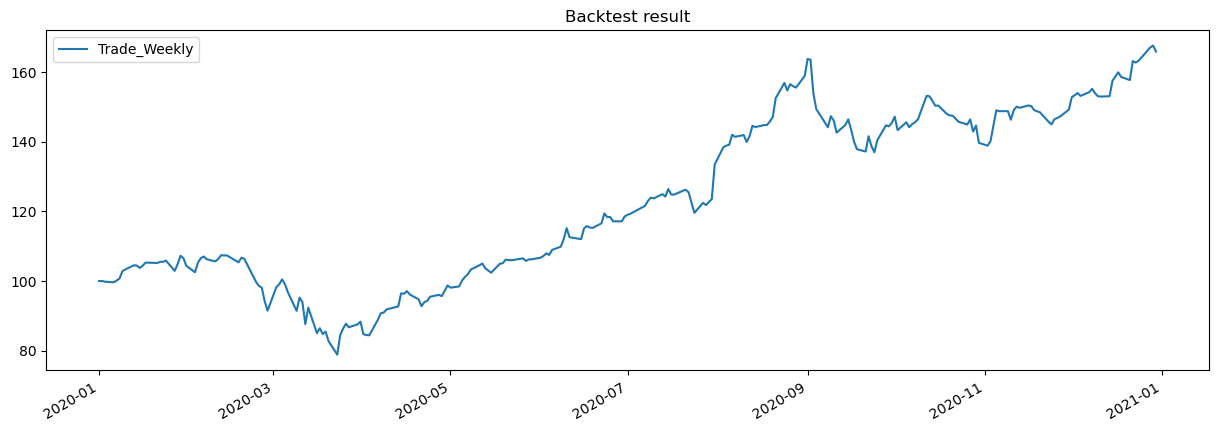

In [3]:
# Define the strategy
bt_strategy = bt.Strategy('Trade_Weekly', 
                         [bt.algos.RunWeekly(),
                          bt.algos.SelectAll(),
                          bt.algos.WeighEqually(),
                          bt.algos.Rebalance()])
# Create a backtest
bt_test = bt.Backtest(bt_strategy, data)
# Run the backtest
bt_res = bt.run(bt_test)
# Plot the test result
bt_res.plot(title="Backtest result")

# Plotting EMA

In [4]:
import talib

In [6]:
# EMA for 14 day period
data['EMA14'] = talib.EMA(data['Close'], timeperiod=14)

# EMA for 21 day period
data['EMA21'] = talib.EMA(data['Close'], timeperiod=21)

data.tail()

,Open,High,Low,Close,Adj Close,Volume,EMA14,EMA21
Date,,,,,,,,
2020-12-23,132.160004,132.429993,130.779999,130.960007,128.200821,88223700,126.346940,124.691147
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.189499,54930100,127.096681,125.352861
2020-12-28,133.990005,137.339996,133.509995,136.690002,133.810043,124486200,128.375791,126.383511
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.028381,121047300,129.241685,127.155009
2020-12-30,135.580002,135.990005,133.399994,133.720001,130.902618,96452100,129.838793,127.751827


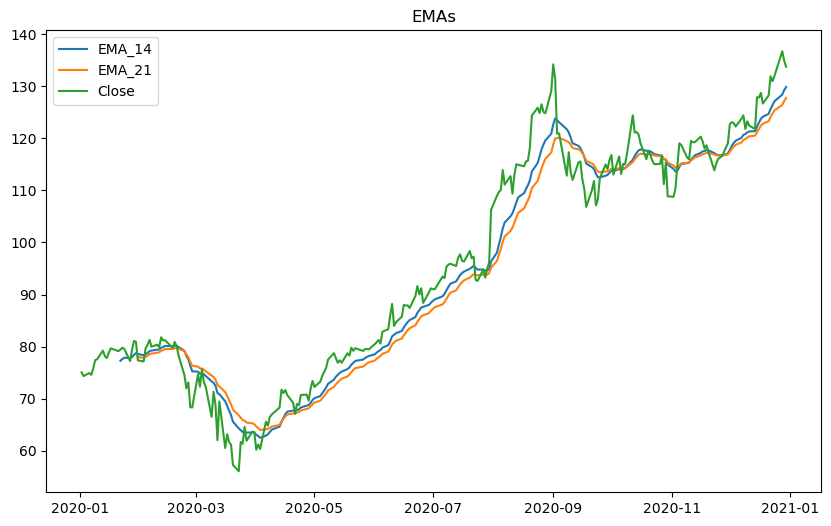

In [14]:
plt.figure(figsize=(10, 6))

# Plot the EMAs with price
plt.plot(data['EMA14'], label='EMA_14')
plt.plot(data['EMA21'], label='EMA_21')
plt.plot(data['Close'], label='Close')

# Customize and show the plot
plt.legend()
plt.title('EMAs')
plt.show()


# Plotting SMA

In [15]:
data['SMA'] = talib.SMA(data['Close'], timeperiod=20)
data.tail()

,Open,High,Low,Close,Adj Close,Volume,EMA14,EMA21,SMA
Date,,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876122,135480400,NaN,NaN,NaN
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167610,146322800,NaN,NaN,NaN
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742661,118387200,NaN,NaN,NaN
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400543,108872000,NaN,NaN,NaN
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565193,132079200,NaN,NaN,NaN


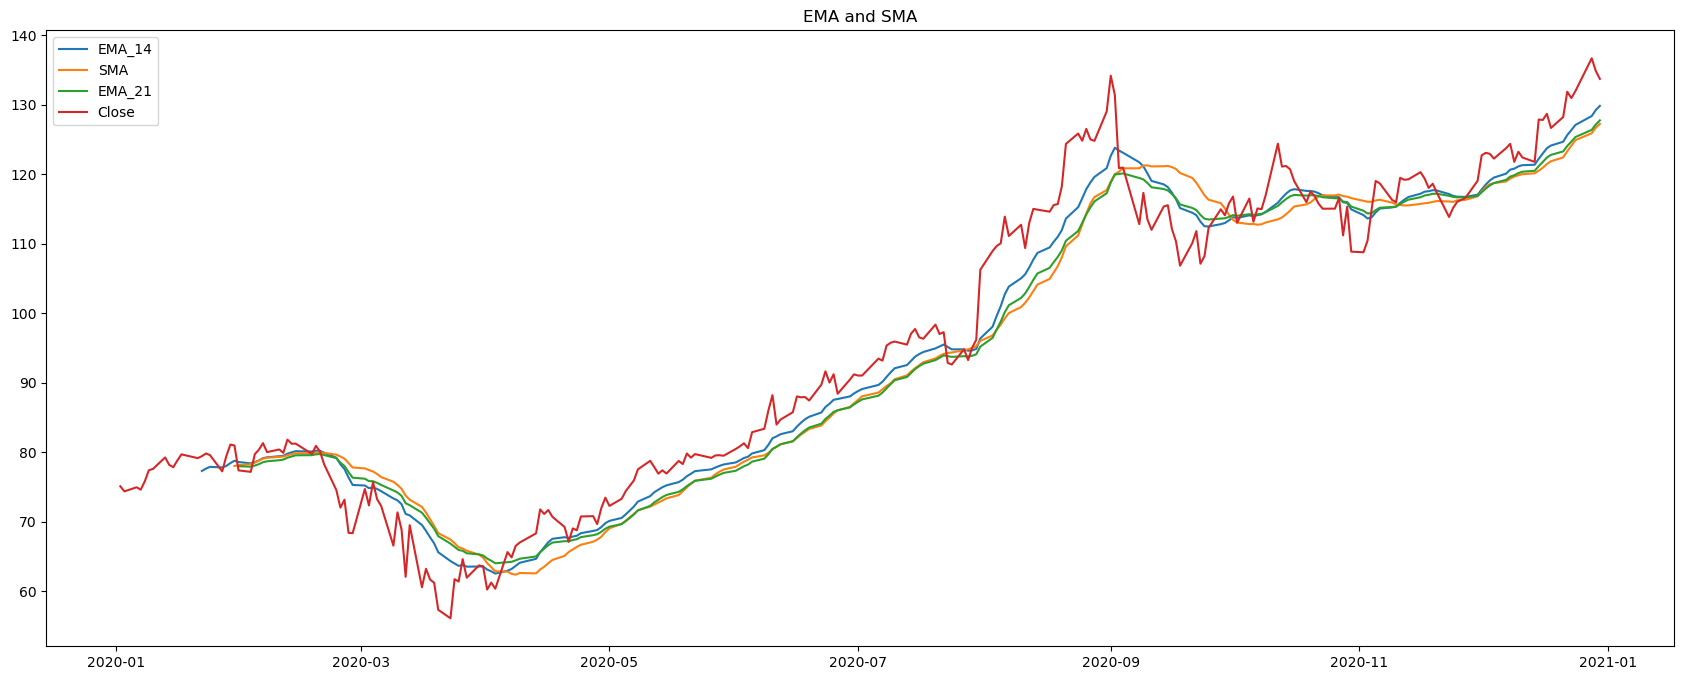

In [19]:
plt.figure(figsize=(21, 8))

# Plot the EMAs with price
plt.plot(data['EMA14'], label='EMA_14')
plt.plot(data['SMA'], label='SMA')
plt.plot(data['EMA21'], label='EMA_21')
plt.plot(data['Close'], label='Close')

# Customize and show the plot
plt.legend()
plt.title('EMA and SMA')
plt.show()


# ADX Indicator

In [20]:
# Using the ADX indicator
data['ADX'] = talib.ADX(data['High'], data['Low'], data['Close'], timeperiod=14)
data.tail()

,Open,High,Low,Close,Adj Close,Volume,EMA14,EMA21,SMA,ADX
Date,,,,,,,,,,
2020-12-23,132.160004,132.429993,130.779999,130.960007,128.200821,88223700,126.346940,124.691147,124.106000,19.541019
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.189499,54930100,127.096681,125.352861,124.903000,20.490430
2020-12-28,133.990005,137.339996,133.509995,136.690002,133.810043,124486200,128.375791,126.383511,125.908001,22.103937
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.028381,121047300,129.241685,127.155009,126.699000,23.837380
2020-12-30,135.580002,135.990005,133.399994,133.720001,130.902618,96452100,129.838793,127.751827,127.249000,25.041166


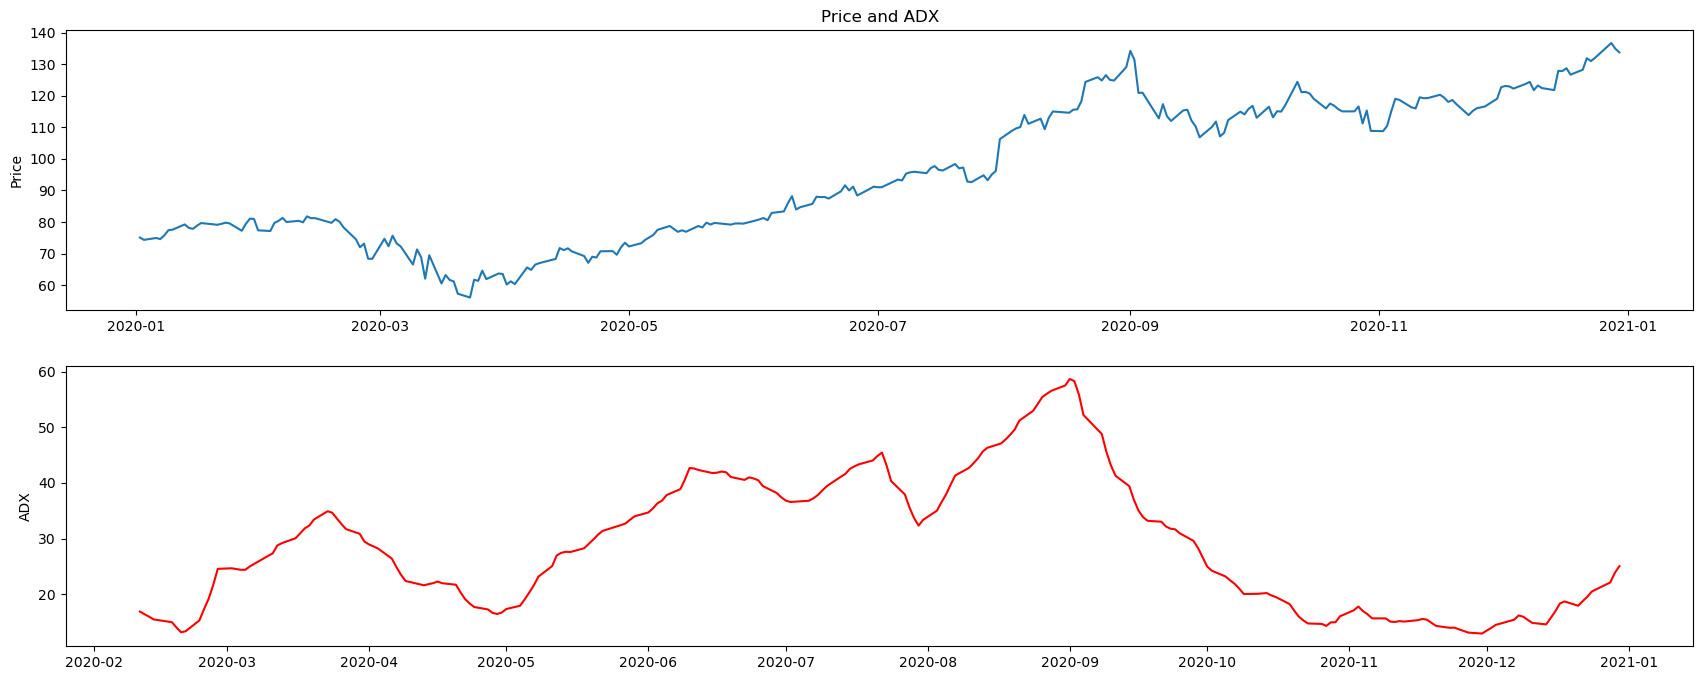

In [25]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2)
ax1.figure.set_size_inches(21, 8)
# Plot ADX with the price
ax1.set_ylabel('Price')
ax1.plot(data['Close'])
ax2.set_ylabel('ADX')
ax2.plot(data['ADX'], color='red')

ax1.set_title('Price and ADX')
plt.show()

# RSI Plot

In [26]:
data['RSI14'] = talib.RSI(data['Close'], timeperiod=14)
data.tail()

,Open,High,Low,Close,Adj Close,Volume,EMA14,EMA21,SMA,ADX,RSI14
Date,,,,,,,,,,,
2020-12-23,132.160004,132.429993,130.779999,130.960007,128.200821,88223700,126.346940,124.691147,124.106000,19.541019,66.417825
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.189499,54930100,127.096681,125.352861,124.903000,20.490430,67.866386
2020-12-28,133.990005,137.339996,133.509995,136.690002,133.810043,124486200,128.375791,126.383511,125.908001,22.103937,73.597952
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.028381,121047300,129.241685,127.155009,126.699000,23.837380,68.522632
2020-12-30,135.580002,135.990005,133.399994,133.720001,130.902618,96452100,129.838793,127.751827,127.249000,25.041166,65.451324


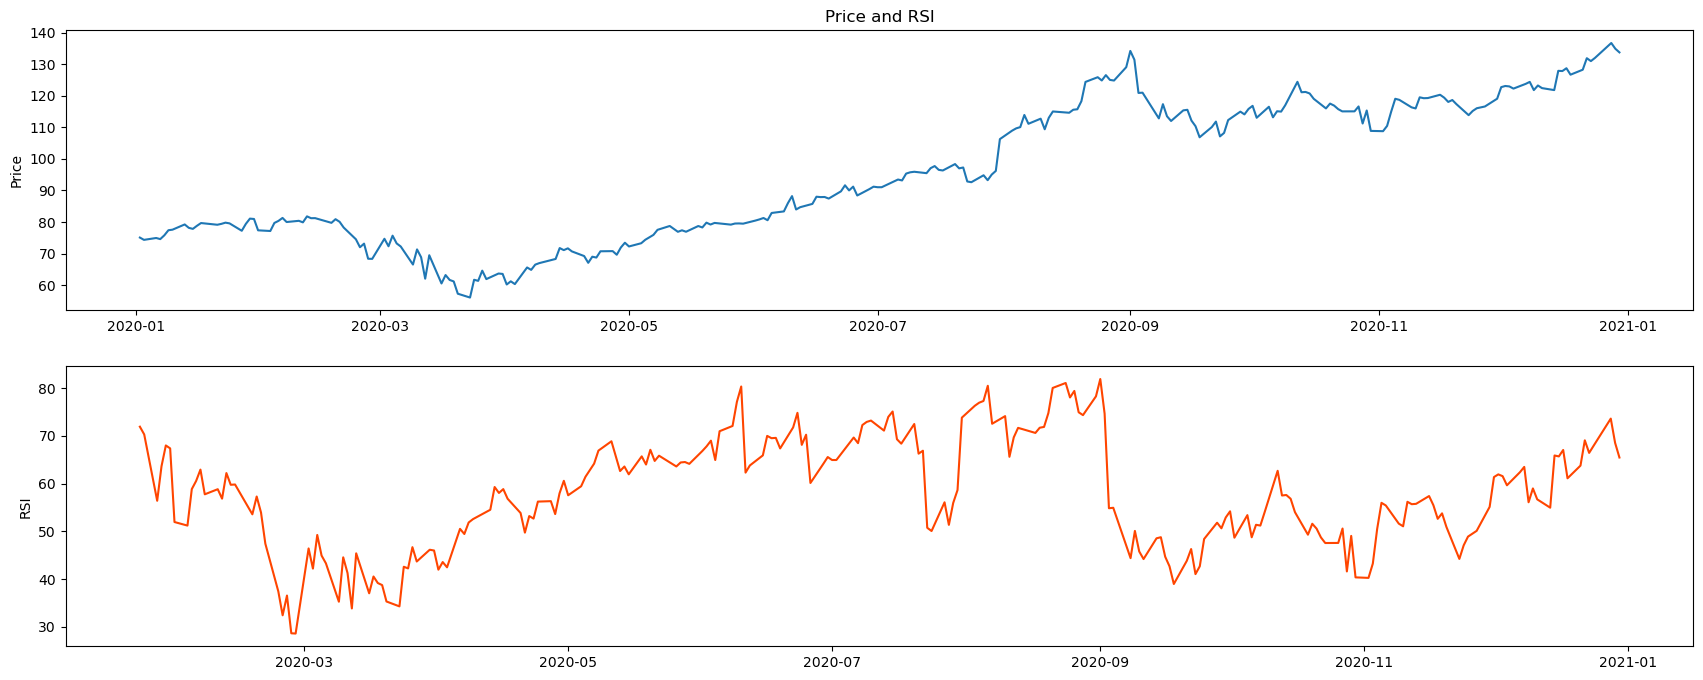

In [28]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2)
ax1.figure.set_size_inches(21, 8)
# Plot RSI with the price
ax1.set_ylabel('Price')
ax1.plot(data['Close'])
ax2.set_ylabel('RSI')
ax2.plot(data['RSI14'], color='orangered')

ax1.set_title('Price and RSI')
plt.show()

# Bolinger Bands Plotting

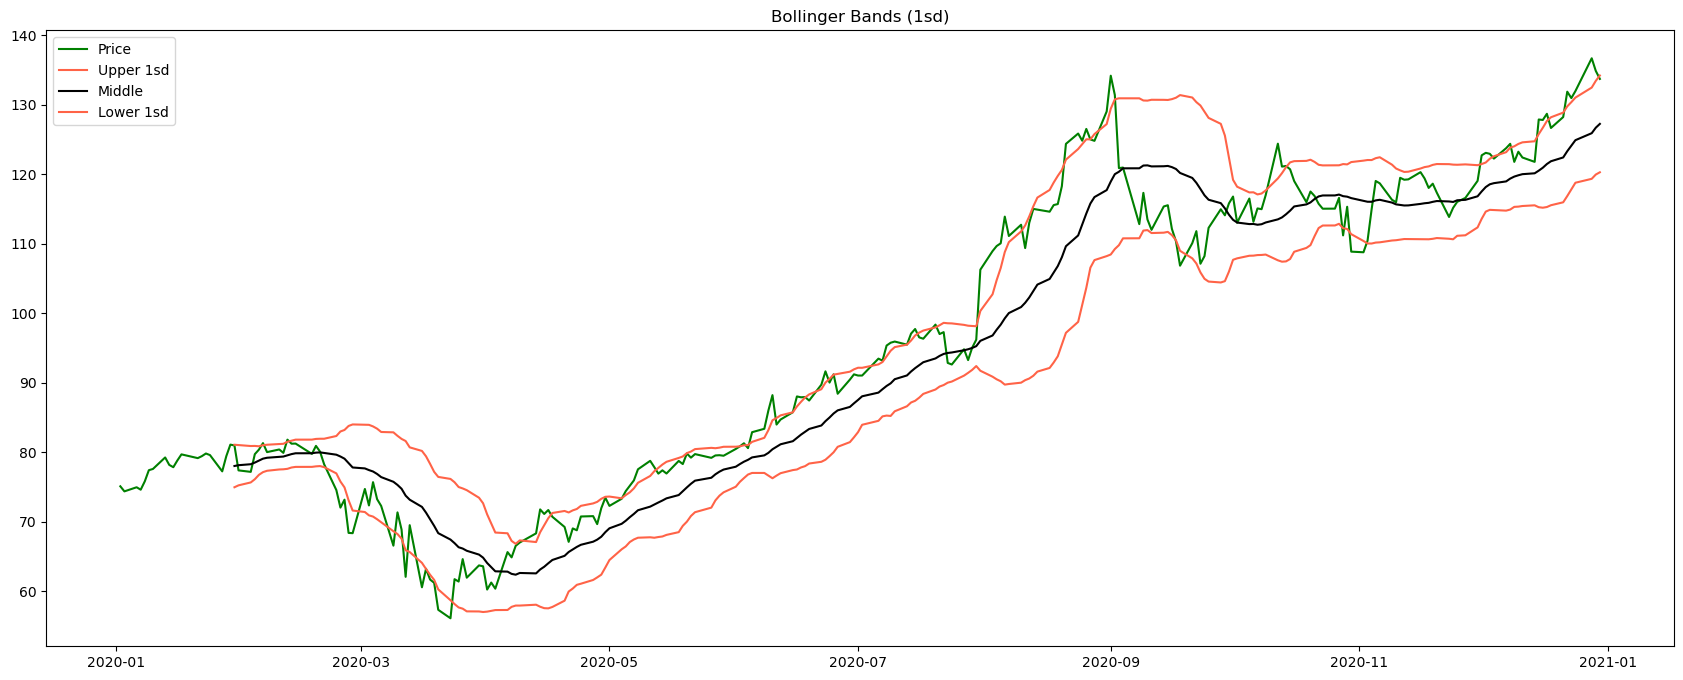

In [29]:
# Define the bolinger bands with 1.5 std using talib
upper_band, mid_band, lower_band = talib.BBANDS(data.Close, timeperiod=20, nbdevup=1.5, nbdevdn=1.5, matype=0)

# Plot the upper and lower Bollinger Bands 
plt.figure(figsize=(21,8))
plt.plot(data['Close'], color='green', label='Price')
plt.plot(upper_band, color='tomato', label="Upper 1sd")
plt.plot(mid_band, color='black', label='Middle')
plt.plot(lower_band, color='tomato', label='Lower 1sd')

# Customize and show the plot
plt.legend(loc='upper left')
plt.title('Bollinger Bands (1.5sd)')
plt.show()